In [1]:
import pandas as pd

# Load data from CSV files
df_properties = pd.read_csv('properties.csv')
df_private_sellers = pd.read_csv('private_seller_properties.csv')

# Combine both datasets into one if needed
df_all_properties = pd.concat([df_properties, df_private_sellers], ignore_index=True)


In [10]:
# Convert EUR prices to лв
eur_to_bgn_conversion_rate = 1.95
df_all_properties['Price in BGN'] = df_all_properties.apply(lambda row: row['Price'] * eur_to_bgn_conversion_rate 
                                                            if row['Currency'] == 'EUR' else row['Price'], axis=1)

# Summary statistics
price_stats = df_all_properties['Price in BGN'].describe()

# Format the summary statistics for better readability
summary_stats_formatted = {
    'Count': f"{price_stats['count']:,.0f}",  # Count of properties
    'Mean': f"{price_stats['mean']:,.2f} BGN",  # Mean price with BGN currency symbol and 2 decimal places
    'Std Dev': f"{price_stats['std']:,.2f} BGN",  # Standard deviation with BGN currency symbol and 2 decimal places
    'Min': f"{price_stats['min']:,.2f} BGN",  # Minimum price with BGN currency symbol and 2 decimal places
    '25%': f"{price_stats['25%']:,.2f} BGN",  # 25th percentile with BGN currency symbol and 2 decimal places
    '50% (Median)': f"{price_stats['50%']:,.2f} BGN",  # Median with BGN currency symbol and 2 decimal places
    '75%': f"{price_stats['75%']:,.2f} BGN",  # 75th percentile with BGN currency symbol and 2 decimal places
    'Max': f"{price_stats['max']:,.2f} BGN"  # Maximum price with BGN currency symbol and 2 decimal places
}

# Print formatted summary statistics
print("Summary Statistics of Property Prices in BGN:")
for key, value in summary_stats_formatted.items():
    print(f"{key}: {value}")



Summary Statistics of Property Prices in BGN:
Count: 414
Mean: 273,226.29 BGN
Std Dev: 179,437.98 BGN
Min: 65,130.00 BGN
25%: 168,562.88 BGN
50% (Median): 234,000.00 BGN
75%: 302,250.00 BGN
Max: 1,521,000.00 BGN


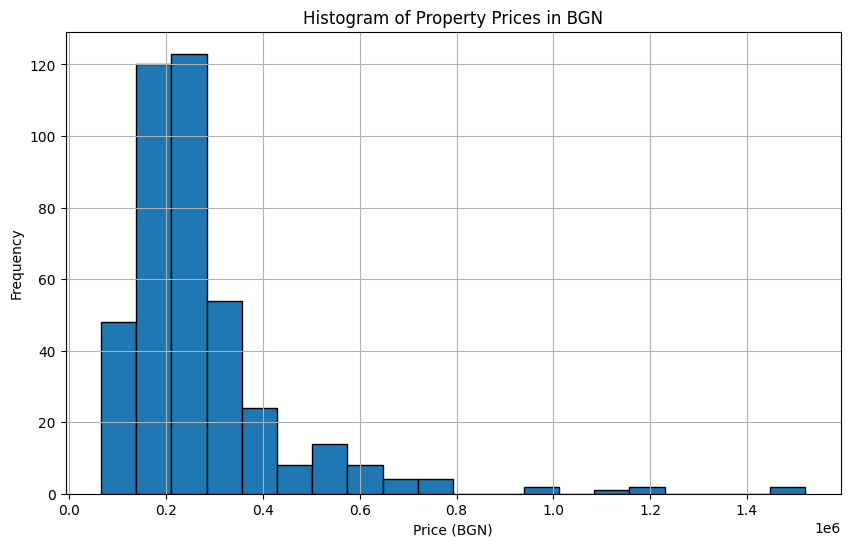

In [11]:
# Visual analysis (example plot)
import matplotlib.pyplot as plt

# Example: Histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(df_all_properties['Price in BGN'], bins=20, edgecolor='black')
plt.title('Histogram of Property Prices in BGN')
plt.xlabel('Price (BGN)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
# Assuming df_all_properties is your combined DataFrame

# Define criteria for uniqueness (e.g., based on URL)
unique_properties = df_all_properties.drop_duplicates(subset=['URL'])

# Display the number of unique properties
print(f"Number of unique properties: {len(unique_properties)}")


Number of unique properties: 217


In [5]:
# Top properties by size
top_properties_by_size = df_all_properties.sort_values(by='Size', ascending=False).head(10)

# Display top properties by size
print("Top 10 Properties by Size:")
print(top_properties_by_size[['Price', 'Size', 'Location', 'Seller']])


Top 10 Properties by Size:
      Price   Size                                 Location  \
401  500000  11000               град Пловдив, Западна дъга   
379  500000  11000               град Пловдив, Западна дъга   
358  300000   8199  град Пловдив, Индустриална зона - Север   
183  300000   8199  град Пловдив, Индустриална зона - Север   
400  360000   8000                       град Пловдив, Южен   
378  360000   8000                       град Пловдив, Южен   
10   589000   4534  град Пловдив, Индустриална зона - Север   
397  369000   3756                       град Пловдив, Южен   
375  369000   3756                       град Пловдив, Южен   
377  147680   3692     град Пловдив, Индустриална зона - Юг   

                       Seller  
401                       NaN  
379                       NaN  
358  yavlena_plovdiv1.imot.bg  
183  yavlena_plovdiv1.imot.bg  
400                       NaN  
378                       NaN  
10      popov_konsult.imot.bg  
397                    

In [6]:
# Assuming df_all_properties is your combined DataFrame

# Count number of ads per seller
seller_ads_count = df_all_properties['Seller'].value_counts()

# Display top sellers by number of ads
print("Top Sellers by Number of Ads:")
print(seller_ads_count.head(10))


Top Sellers by Number of Ads:
Seller
avangardimoti.imot.bg       51
perspektivaimot.imot.bg     36
home2u3.imot.bg             22
candela.imot.bg             14
kondor.imot.bg              14
estateshop22.imot.bg        12
luximmoplovdiv.imot.bg      10
armadaimoti.imot.bg         10
yavlena_plovdiv1.imot.bg     8
imotkonsult.imot.bg          8
Name: count, dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from MongoDB or CSV (assuming df_all_properties is already loaded)
# Example: df_all_properties = pd.read_csv('properties.csv')

# Convert floor to numeric, handling 'N/A' values as NaN
df_all_properties['Floor'] = pd.to_numeric(df_all_properties['Floor'], errors='coerce')

# Filter out properties with valid floors
df_all_properties_valid_floor = df_all_properties[df_all_properties['Floor'].notna()]

# Convert Year to numeric, handling 'N/A' values as NaN
df_all_properties_valid_floor['Year'] = pd.to_numeric(df_all_properties_valid_floor['Year'], errors='coerce')

# Set up plot style
sns.set(style="whitegrid")


C:\Users\564951\AppData\Local\Temp\ipykernel_22244\2765702928.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_properties_valid_floor['Year'] = pd.to_numeric(df_all_properties_valid_floor['Year'], errors='coerce')


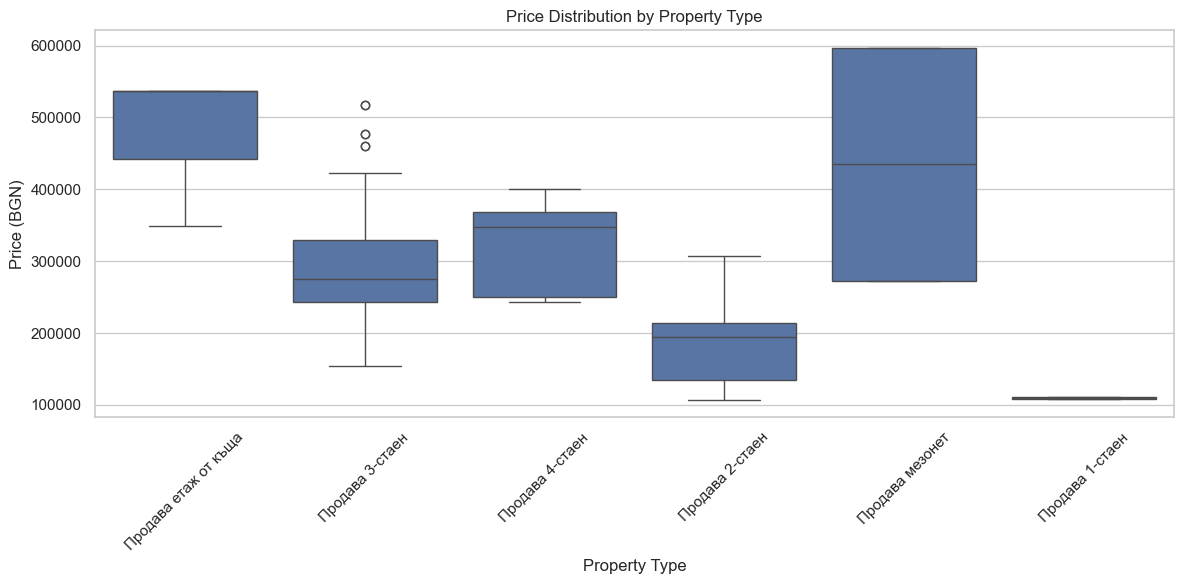

In [14]:
# Example 1: Price distribution by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Price in BGN', data=df_all_properties_valid_floor)
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Price (BGN)')
plt.tight_layout()
plt.show()

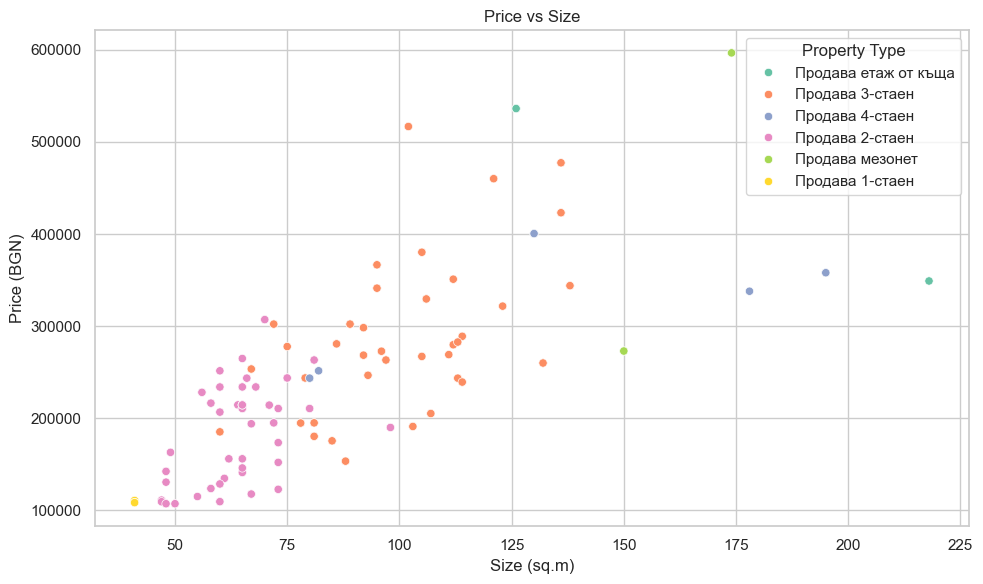

In [15]:
# Example 2: Price vs Size scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Price in BGN', data=df_all_properties_valid_floor, hue='Property Type', palette='Set2')
plt.title('Price vs Size')
plt.xlabel('Size (sq.m)')
plt.ylabel('Price (BGN)')
plt.tight_layout()
plt.show()


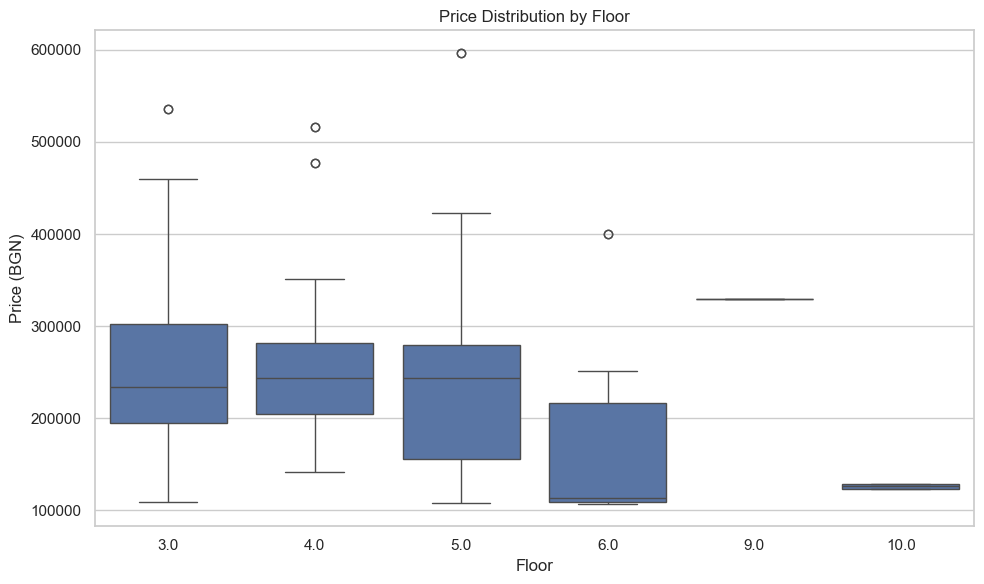

In [16]:
# Example 3: Price distribution by Floor
plt.figure(figsize=(10, 6))
sns.boxplot(x='Floor', y='Price in BGN', data=df_all_properties_valid_floor)
plt.title('Price Distribution by Floor')
plt.xlabel('Floor')
plt.ylabel('Price (BGN)')
plt.tight_layout()
plt.show()

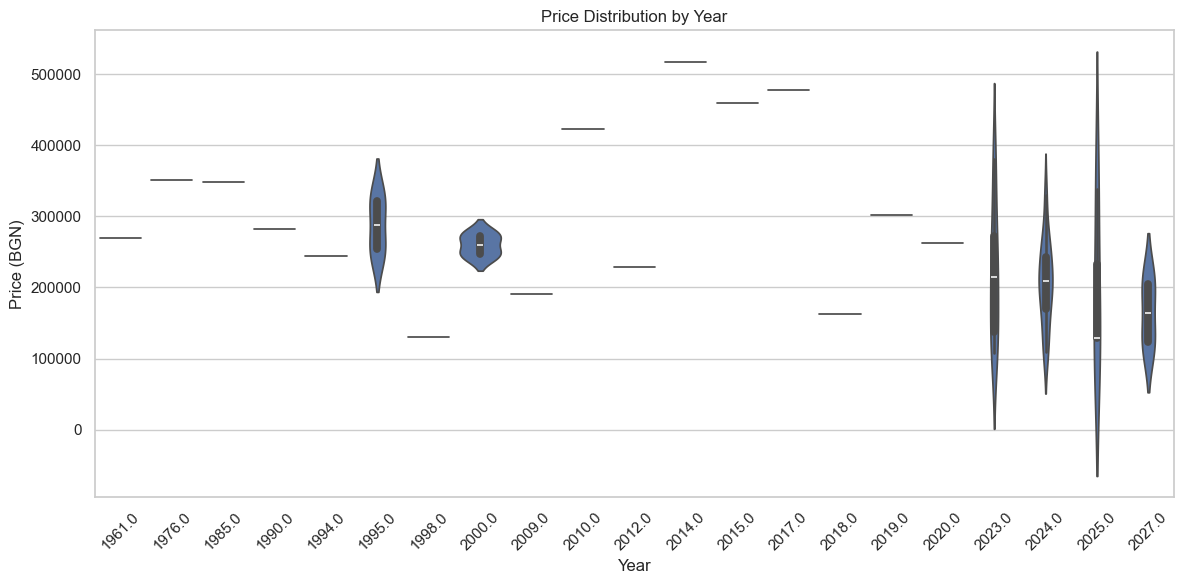

In [17]:
# Example 4: Price distribution by Year
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Price in BGN', data=df_all_properties_valid_floor)
plt.title('Price Distribution by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Price (BGN)')
plt.tight_layout()
plt.show()

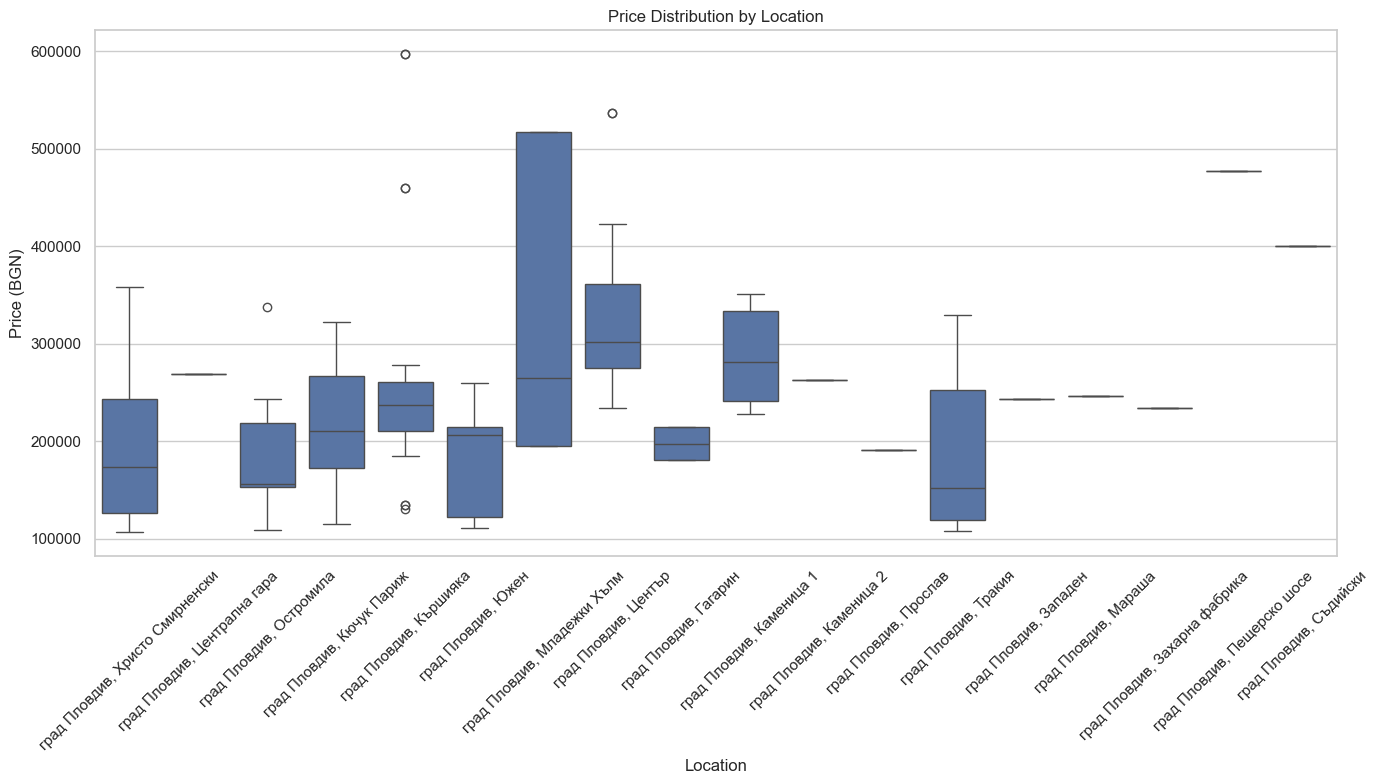

In [18]:
# Example 5: Price distribution by Location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Price in BGN', data=df_all_properties_valid_floor)
plt.title('Price Distribution by Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Price (BGN)')
plt.tight_layout()
plt.show()